# Exploratory Data Analysis in Python



#Importing all Libraries required for EDA

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read the layoff dataset file importing in jupyter


df=pd.read_csv("layoffs.csv")
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,BloomTech,SF Bay Area,Education,88.0,0.50,2022-12-01,Unknown,United States,NaN
1,Podium,Lehi,Support,NaN,0.12,2022-12-01,Series D,United States,419.0
2,DoorDash,SF Bay Area,Food,1250.0,0.06,2022-11-30,IPO,United States,2500.0
3,Kraken,SF Bay Area,Crypto,1100.0,0.30,2022-11-30,Unknown,United States,134.0
4,Happy Money,Los Angeles,Finance,158.0,0.34,2022-11-30,Series D,United States,191.0
...,...,...,...,...,...,...,...,...,...
1709,Service,Los Angeles,Travel,NaN,1.00,2020-03-16,Seed,United States,5.1
1710,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
1711,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
1712,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0


In [5]:
# cheaking the number of rows and column in dataset

df.shape

(1714, 9)

In [6]:
# showing the top 5 record in the dataset

df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,BloomTech,SF Bay Area,Education,88.0,0.50,2022-12-01,Unknown,United States,NaN
1,Podium,Lehi,Support,NaN,0.12,2022-12-01,Series D,United States,419.0
2,DoorDash,SF Bay Area,Food,1250.0,0.06,2022-11-30,IPO,United States,2500.0
3,Kraken,SF Bay Area,Crypto,1100.0,0.30,2022-11-30,Unknown,United States,134.0
4,Happy Money,Los Angeles,Finance,158.0,0.34,2022-11-30,Series D,United States,191.0


In [7]:
#Generate descriptive statistics.


df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_laid_off,1209.0,197.839537,571.584820,3.0,31.0,70.00,150.00,11000.0
percentage_laid_off,1152.0,0.277020,0.267365,0.0,0.1,0.19,0.33,1.0
funds_raised,1591.0,873.347137,6418.423380,0.0,44.0,132.00,380.50,121900.0


In [8]:
# cheacking the null values in data set and fixing it

df.isna().sum()

company                  0
location                 0
industry                 3
total_laid_off         505
percentage_laid_off    562
date                     0
stage                    4
country                  0
funds_raised           123
dtype: int64

In [9]:
# dropping some column from the table which is not much requird for the EDA

df=df.drop(["percentage_laid_off","stage","funds_raised"],axis=1)
df

,company,location,industry,total_laid_off,date,country
0,BloomTech,SF Bay Area,Education,88.0,2022-12-01,United States
1,Podium,Lehi,Support,NaN,2022-12-01,United States
2,DoorDash,SF Bay Area,Food,1250.0,2022-11-30,United States
3,Kraken,SF Bay Area,Crypto,1100.0,2022-11-30,United States
4,Happy Money,Los Angeles,Finance,158.0,2022-11-30,United States
...,...,...,...,...,...,...
1709,Service,Los Angeles,Travel,NaN,2020-03-16,United States
1710,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,United States
1711,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,United States
1712,Tamara Mellon,Los Angeles,Retail,20.0,2020-03-12,United States


In [10]:
# Replacing null values form the data set

df.total_laid_off = df.total_laid_off.fillna(0)
df.industry=df.industry.fillna("unknown")
df

,company,location,industry,total_laid_off,date,country
0,BloomTech,SF Bay Area,Education,88.0,2022-12-01,United States
1,Podium,Lehi,Support,0.0,2022-12-01,United States
2,DoorDash,SF Bay Area,Food,1250.0,2022-11-30,United States
3,Kraken,SF Bay Area,Crypto,1100.0,2022-11-30,United States
4,Happy Money,Los Angeles,Finance,158.0,2022-11-30,United States
...,...,...,...,...,...,...
1709,Service,Los Angeles,Travel,0.0,2020-03-16,United States
1710,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,United States
1711,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,United States
1712,Tamara Mellon,Los Angeles,Retail,20.0,2020-03-12,United States


In [11]:
# finding top 5 compnies with most laid off in world

top_companies = df.nlargest(5,['total_laid_off'])
top_companies

,company,location,industry,total_laid_off,date,country
132,Meta,SF Bay Area,Consumer,11000.0,2022-11-09,United States
70,Amazon,Seattle,Retail,10000.0,2022-11-16,United States
1138,Booking.com,Amsterdam,Travel,4375.0,2020-07-30,Netherlands
71,Cisco,SF Bay Area,Infrastructure,4100.0,2022-11-16,United States
161,Twitter,SF Bay Area,Consumer,3700.0,2022-11-04,United States


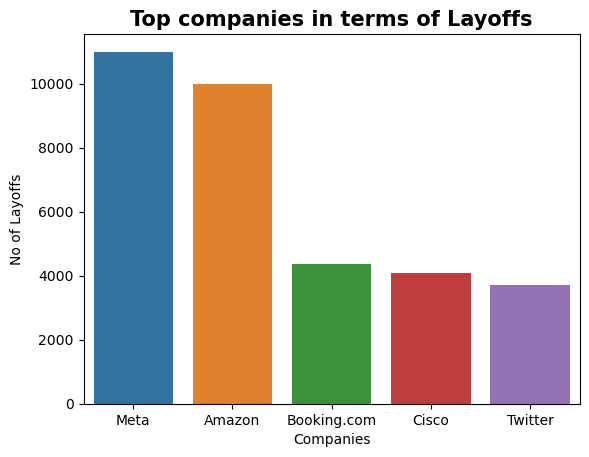

In [12]:
#plotting bar graph based on above analysis

sns.barplot(x=top_companies.company, y=top_companies.total_laid_off)
plt.title("Top companies in terms of Layoffs", fontsize=15, fontweight='bold')
plt.xlabel("Companies")
plt.ylabel("No of Layoffs")
plt.show()

In [13]:
# finding top 5 countries with most laid off

top_countries=df.groupby('country')["total_laid_off"].sum().sort_values(ascending=False).head()
top_countries

country
United States    158128.0
India             29726.0
Brazil             7525.0
Singapore          5493.0
Canada             5199.0
Name: total_laid_off, dtype: float64

<AxesSubplot:>

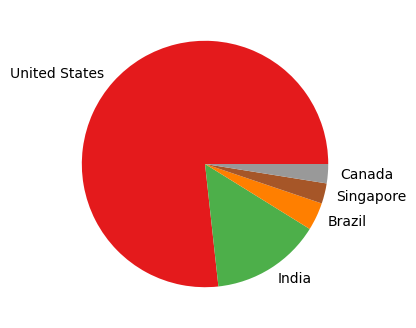

In [14]:
# representing in pie chart

top_countries.plot(ylabel="",figsize=(4,4), kind='pie', stacked=True, colormap='Set1')

In [15]:
# top industries whis is affected by the laid_off

top_industries=df.groupby('industry')["total_laid_off"].sum().sort_values(ascending=False).head()
arr = np.array(['transportation','Consumer','Retail','Finance','Food'])

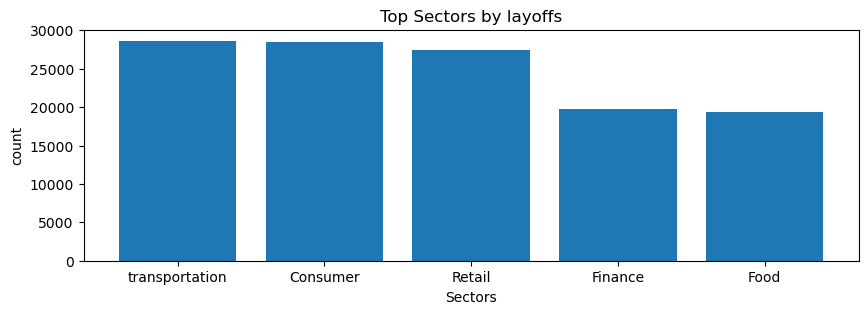

In [16]:
plt.figure(figsize=(10,3))
plt.bar(arr,top_industries)
plt.xlabel('Sectors')
plt.ylabel('count')
plt.title('Top Sectors by layoffs')
plt.show()

In [17]:
#top 5 cities affected by the laid off

top_Cities=df.groupby('location')["total_laid_off"].sum().sort_values(ascending=False).head()
arr2 = np.array(['SF bay Area','NYC','Bengaluru','seattle','boston'])

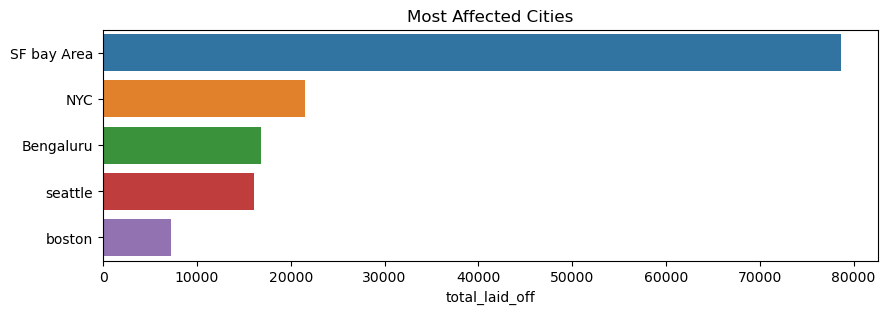

In [18]:
plt.figure(figsize=(10,3))
ax = sns.barplot(x=top_Cities, y=arr2, data=df)
plt.title('Most Affected Cities')
plt.show()

<AxesSubplot:title={'center':'Total Layoffs in different industries world wide since 2020'}, xlabel='industry', ylabel='Number of layoffs reported'>

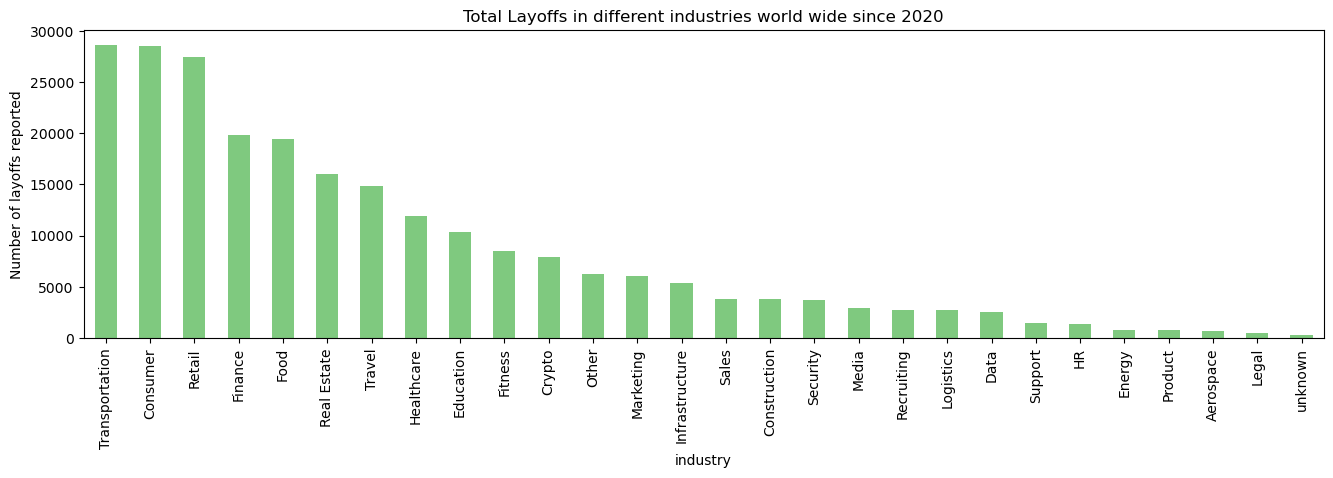

In [19]:
# Total Layoffs in different industries world wide since 2020
plt.figure(figsize=(8, 6))
plt.title("Total Layoffs in different industries world wide since 2020")
plt.ylabel("Number of layoffs reported")
df_industries = df.groupby('industry').sum()['total_laid_off'].sort_values(ascending=False)
df_industries.plot(figsize=(16,4), kind='bar', stacked=True, colormap='Accent')

In [20]:
# copy the data set for further insights

df_1=df.copy()
df_1

,company,location,industry,total_laid_off,date,country
0,BloomTech,SF Bay Area,Education,88.0,2022-12-01,United States
1,Podium,Lehi,Support,0.0,2022-12-01,United States
2,DoorDash,SF Bay Area,Food,1250.0,2022-11-30,United States
3,Kraken,SF Bay Area,Crypto,1100.0,2022-11-30,United States
4,Happy Money,Los Angeles,Finance,158.0,2022-11-30,United States
...,...,...,...,...,...,...
1709,Service,Los Angeles,Travel,0.0,2020-03-16,United States
1710,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,United States
1711,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,United States
1712,Tamara Mellon,Los Angeles,Retail,20.0,2020-03-12,United States


In [21]:
# split the date into the str and the int to get more insights of the data and aad new column to dataset


df_1["year"]=df_1['date'].str.split('-').str[0]
df_1["month"]=df_1['date'].str.split('-').str[1]
df_1["day"]=df_1['date'].str.split('-').str[2]

df_1['year']=df_1['year'].astype(int)
df_1['month']=df_1['month'].astype(int)
df_1['day']=df_1['day'].astype(int)

In [22]:
df_1

,company,location,industry,total_laid_off,date,country,year,month,day
0,BloomTech,SF Bay Area,Education,88.0,2022-12-01,United States,2022,12,1
1,Podium,Lehi,Support,0.0,2022-12-01,United States,2022,12,1
2,DoorDash,SF Bay Area,Food,1250.0,2022-11-30,United States,2022,11,30
3,Kraken,SF Bay Area,Crypto,1100.0,2022-11-30,United States,2022,11,30
4,Happy Money,Los Angeles,Finance,158.0,2022-11-30,United States,2022,11,30
...,...,...,...,...,...,...,...,...,...
1709,Service,Los Angeles,Travel,0.0,2020-03-16,United States,2020,3,16
1710,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,United States,2020,3,13
1711,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,United States,2020,3,13
1712,Tamara Mellon,Los Angeles,Retail,20.0,2020-03-12,United States,2020,3,12


In [23]:
df_1['year'].value_counts(sort=True)

2022    1038
2020     633
2021      43
Name: year, dtype: int64

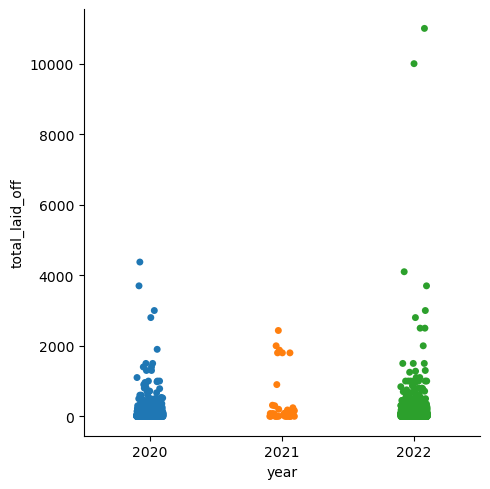

In [24]:
# year wise distribution of layoff

cat=sns.catplot(x='year', y='total_laid_off', data=df_1)

# Analysis on the daya of coutry india

In [25]:
df_india = df_1[df_1['country']=="India"]
df_india

,company,location,industry,total_laid_off,date,country,year,month,day
8,Teachmint,Bengaluru,Education,45.0,2022-11-30,India,2022,11,30
23,Hirect,Bengaluru,Recruiting,200.0,2022-11-28,India,2022,11,28
33,VerSe Innovation,Bengaluru,Media,150.0,2022-11-25,India,2022,11,25
50,Zomato,Gurugram,Food,100.0,2022-11-19,India,2022,11,19
139,Plum,Bengaluru,Healthcare,36.0,2022-11-09,India,2022,11,9
...,...,...,...,...,...,...,...,...,...
1579,Acko,Mumbai,Finance,45.0,2020-04-01,India,2020,4,1
1611,FabHotels,New Delhi,Travel,80.0,2020-03-30,India,2020,3,30
1625,TravelTriangle,Gurugram,Travel,250.0,2020-03-28,India,2020,3,28
1652,Fareportal,Gurugram,Travel,200.0,2020-03-26,India,2020,3,26


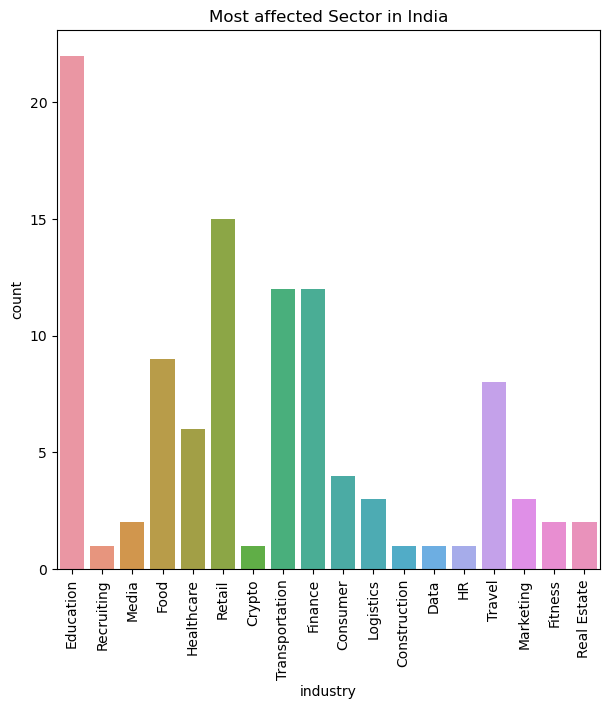

In [26]:
plt.figure(figsize=(7,7))
sns.countplot(x=df_india['industry'], data=df_india)
plt.title('Most affected Sector in India')
plt.xticks(rotation=90)
plt.show()

In [27]:
top_companies_india = df_india.nlargest(5,['total_laid_off'])
top_companies_india

,company,location,industry,total_laid_off,date,country,year,month,day
261,Byju's,Bengaluru,Education,2500.0,2022-10-12,India,2022,10,12
1072,Bytedance,Mumbai,Consumer,1800.0,2021-01-27,India,2021,1,27
1080,WhiteHat Jr,Mumbai,Education,1800.0,2021-01-06,India,2021,1,6
1185,PaisaBazaar,Gurugram,Finance,1500.0,2020-06-16,India,2020,6,16
1232,Ola,Bengaluru,Transportation,1400.0,2020-05-20,India,2020,5,20


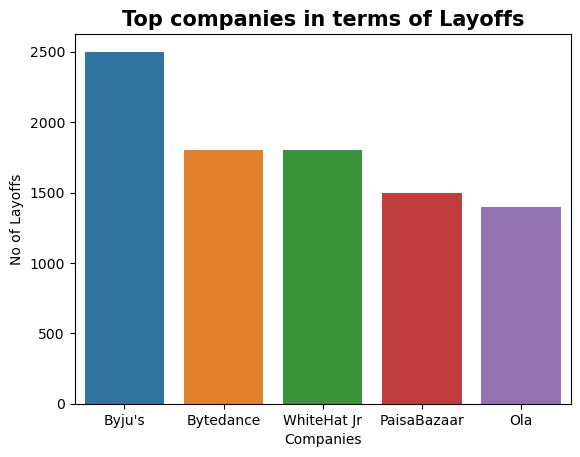

In [28]:
sns.barplot(x=top_companies_india.company, y=top_companies_india.total_laid_off)
plt.title("Top companies in terms of Layoffs", fontsize=15, fontweight='bold')
plt.xlabel("Companies")
plt.ylabel("No of Layoffs")
plt.show()

<AxesSubplot:title={'center':'Total Layoffs in different industries In India since 2020'}, xlabel='industry', ylabel='Number of layoffs reported'>

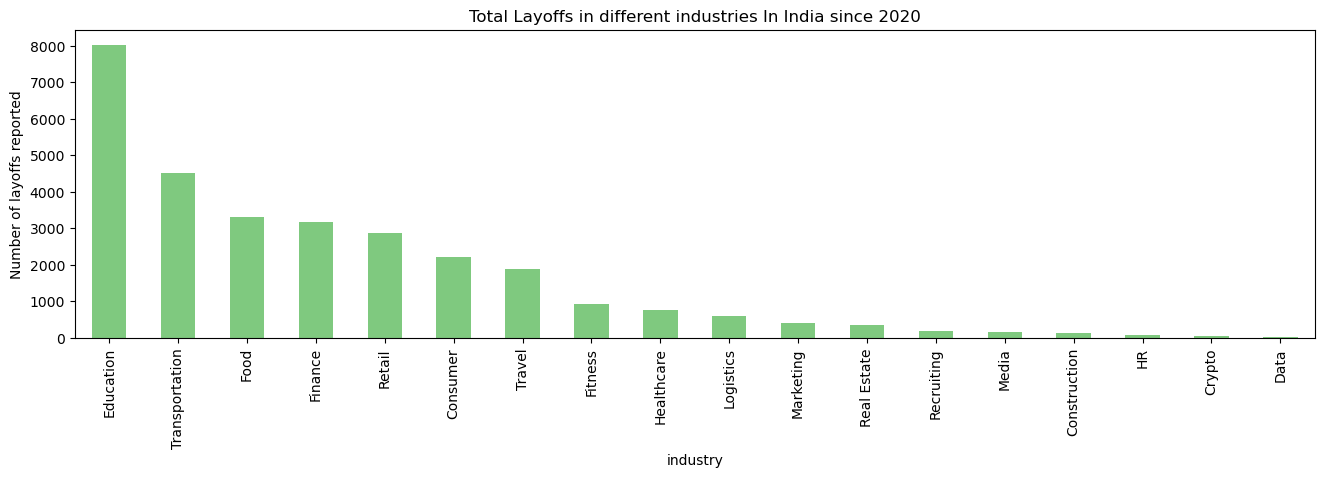

In [29]:
plt.figure(figsize=(8, 6))
plt.title("Total Layoffs in different industries In India since 2020")
plt.ylabel("Number of layoffs reported")
df_industries = df_india.groupby('industry').sum()['total_laid_off'].sort_values(ascending=False)
df_industries.plot(figsize=(16,4), kind='bar', stacked=True, colormap='Accent')

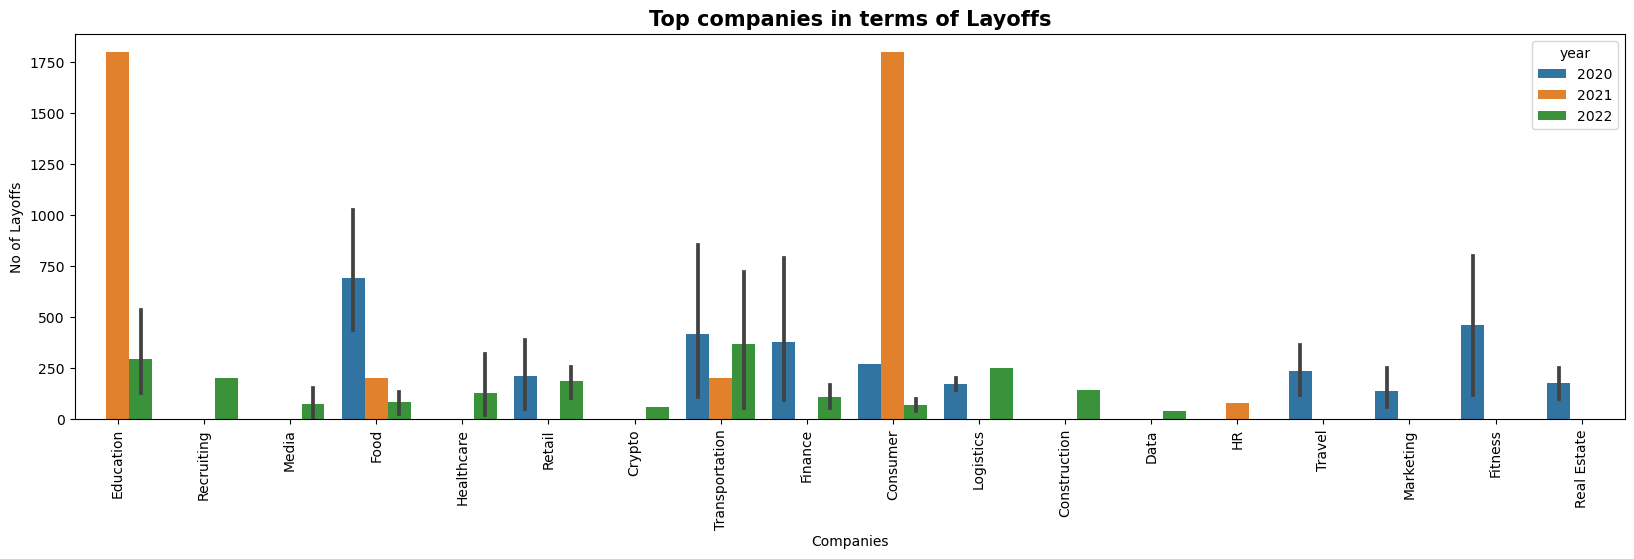

In [30]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=df_india.industry, y=df_india.total_laid_off,hue='year' , data=df_india)
plt.title("Top companies in terms of Layoffs", fontsize=15, fontweight='bold')
plt.xlabel("Companies")
plt.ylabel("No of Layoffs")
plt.show()

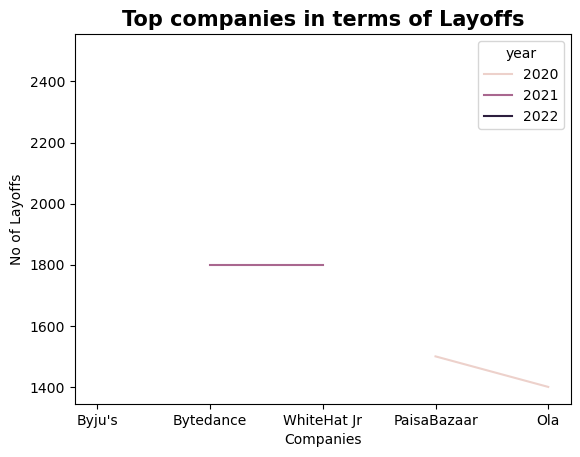

In [35]:
sns.lineplot(x=top_companies_india.company, y=top_companies_india.total_laid_off,hue="year",data=df_india)
plt.title("Top companies in terms of Layoffs", fontsize=15, fontweight='bold')
plt.xlabel("Companies")
plt.ylabel("No of Layoffs")
plt.show()